# Goal
Today's goal is to revisit chapter 3, 4, 5 and finish their exercises.

I was off balance between taking in new material and making sure that what I have taken is solidly integrated. We're fixing that with these exercises and flashcard/ feynmans on the topics before going further.

# Debrief
1. Once again reminding myself I don't need validation set when I'm doing cross-validation...
2. KNN gridsearch took 20m ... Is there a faster way?
3. It was nice re-implementing pixel shifting function from scratch to learn he just used a library to do it -- can't blame him!

### Questions
1. -

### Answers
1. -

---

# Chapter 3 Exercises




## 1
Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).


### Data Prep

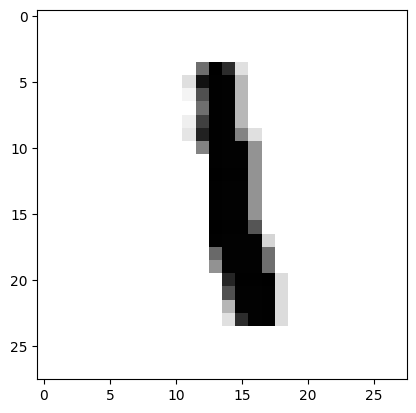

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  #plt.axis("off")
  plt.show()

plot_digit(X[6])

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


### Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# So I need to specify what knn model I'll use. I'll do grid search on it. So I need parameter grid for it.
# then I train it and get the best parameters on the validation set (cross-validation?)
# then I test it on the test set.

param_grid = [
    {'weights': ["uniform", "distance"], 'n_neighbors': [ 4, 5, 6]}
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

### Evaluation

In [ ]:
# here i test the best grid parameters on the test set

grid_search.best_estimator_.score(X_test, y_test)

0.9714

---
## 2
Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.





In [14]:
def pixel_shifter(image_array):
  left_image = image_array.copy()
  right_image = image_array.copy()
  up_image = image_array.copy()
  down_image = image_array.copy()

  for i in range(len(image_array)):
    if (image_array[i] != 0):
      left_image[i-1] = image_array[i]
      right_image[i+1] = image_array[i]
      up_image[i-27] = image_array[i]
      down_image[i+27] = image_array[i]

  return left_image, right_image, up_image, down_image

  # ℹ️ input: image (or array of pixel values)
  # 🔀 computations:
  # 1. first make a copy of the array which you'll give out
  # 2. loop over each value in array and shift it to right, left
  # 3. okay, one to the left and right is easy, when looping you just take i+1 and i-1 and you substitute them.
      #print(f"This {image_array[i]} moved to left, which is this: {image_array[i-1]}")
      #print(f"This {image_array[i]} moved to right, which is this: {image_array[i+1]}")
  # 4. for up and down slightly more complex, actually it isn't! you take +-27 and here you have it!
      #print(f"This {image_array[i]} moved up, which is this: {image_array[i-27]}")
      #print(f"This {image_array[i]} moved down, which is this: {image_array[i+27]}")
  # ➡️ output: 4 images, each shifted in different direction

  # ❓ questions:
    # how to do up, down?
      # it's 28x28 image, so you have to take every 28th? value after (/ before) the picked one and change it
    # how to handle barrier cases when they have nowhere to move?
      # maybe first just check whether value is zero or not, shift only if it isn't.

pixel_shifter(X_train[1])

# Not sure if all of it is correct feedback from gemini, but I also don't mind using library. So because of this feedback I won't use this cell: Up/Down Shift Logic: For a 28x28 image flattened into a 1D array, a purely vertical shift up or down requires adding or subtracting 28 from the index. Your current code uses i-27 and i+27, which would result in diagonal shifts rather than vertical ones.
#Boundary Conditions and Wrapping: The current implementation for left/right/up/down shifts does not correctly handle pixels at the edges of the image. Pixels shifted off one edge might wrap around to the other side of the image, or cause IndexError, which is typically not the desired behavior for image augmentation. A proper shift usually discards pixels moving off the edge and fills the newly exposed area with zeros.
#Overwriting vs. Shifting: Your loop for i in range(len(image_array)): if (image_array[i] != 0): left_image[i-1] = image_array[i] will not correctly 'shift' the image. It merely copies non-zero pixel values to an adjacent index, overwriting whatever was there. It doesn't correctly move the entire image content or fill the vacated spaces with zeros. This will lead to distorted or incorrect shifted images.

# Loop pixel_shifter over all training examples.
for i in range(len(X_train)):
  pixel_shifter(X_train[i])


  # So I need to loop over the X_train, and also copy y_train for each of the shifted X_train.

# Add them to the training set.


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  51 159 253 159  50  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  54 227 253 252 239 233 252  57   6   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253
 122 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 163 252 252 252 253 252 252  96 189 253 167 167   

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

knn_clf = KNeighborsClassifier(n_neighbors = 4, weights='distance')
knn_clf.fit(X_train_augmented, y_train_augmented)
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

---
## 3
Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively, you can download the data from https://homl.info/titanic.tgz and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files, train.csv and test.csv, which you can load using pandas.read_csv(). The goal is to train a classifier that can predict the Survived column based on the other columns.



In [ ]:
# I worked on it before, and I won't re-do it now. I'll save it and do it well as one of the closing projects for ML before moving to DL.

---
## 4
Build a spam classifier (a more challenging exercise):
    a. Download examples of spam and ham from Apache SpamAssassin’s public datasets.
    b. Unzip the datasets and familiarize yourself with the data format.
    c. Split the data into a training set and a test set.
    d. Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word. You may want to add hyperparameters to your preparation pipeline to control whether to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL”, replace all numbers with “NUMBER”, or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
    e. Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

  

In [ ]:
# This is a good dataset/ task to use as an ML project before moving to DL. I'll save it for later.